Um setup para rodar em python 2 e 3

In [91]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
seed = 72
np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Pegando os dados

In [30]:
from sklearn.datasets import load_boston #utilizando o próprio sklearn para obter os dados
boston = load_boston()
boston.keys() #para visualizar melhor oq temos disponível

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Descrição do conjunto de dados

In [31]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Agora, vamos converter os dados para uma tabela de dados (dataframe)

In [32]:
dataFrame = pd.DataFrame(boston.data, columns = boston.feature_names)
dataFrame.head() #visualizar os primeiros dados da tabela

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Quando visualizamos os dados, é possível parceber que está faltando dados sobre os preços. Estes dados estão contidos em "boston.target", portanto precisamos adicioná-los em nosso dataframe.

In [33]:
dataFrame['PRICE'] = boston.target
dataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


A principio, todos os dados são numéricos, mas vamos nos informar melhor sobre os dados

In [34]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [35]:
dataFrame.describe() #aqui temos algumas medidas resumo sobre o conjunto de dados

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Alguns histogramas

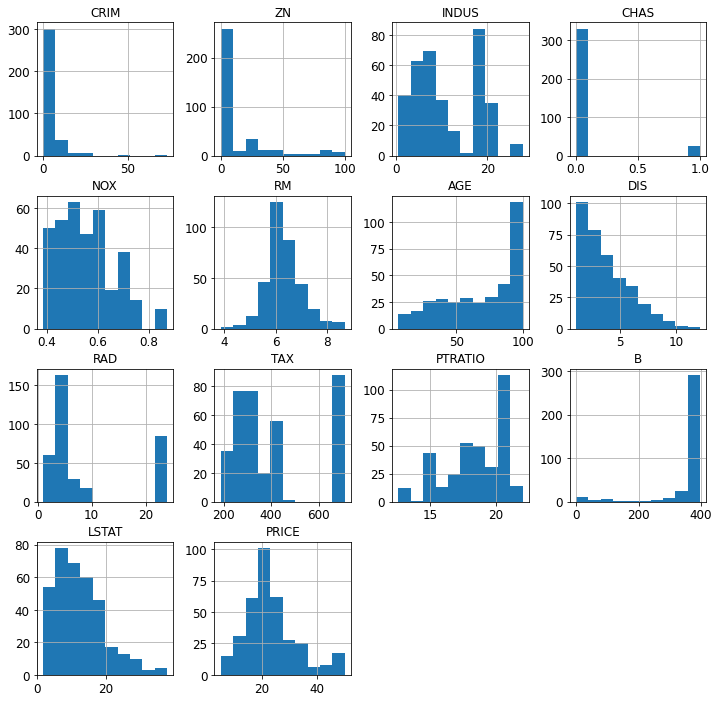

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
dataFrame.hist(figsize=(12,12))
plt.show()

Para fazer a separação do conjunto de dados, vamos testar dois tipos de amostragem: a aleatória e a estratificada.

In [37]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataFrame, 
                                       test_size=0.3, #30% para teste
                                       random_state=seed)

Essa é a divisão aleatória! 
Vamos ver as medidas resumo para o número de quartos por habitação (RM)

In [38]:
dataFrame["RM"].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [39]:
mean = np.mean(dataFrame["RM"])
std = np.std(dataFrame["RM"])

Já que queremos comparar com uma amostra estratificada, vamos dividir o número de quartos em 5 estratos, de 1 em 1 quartos. (Escolha facilitadora.) -> **feature engineering**.

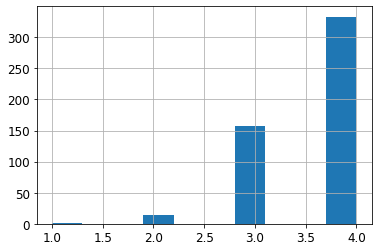

In [71]:
dataFrame["rooms"] = pd.cut(dataFrame["RM"],
                               bins=[3, 4, 5, 6., np.inf],
                               labels=[1, 2, 3, 4])

dataFrame["rooms"].hist()

In [72]:
dataFrame["rooms"].value_counts()

4    333
3    157
2     14
1      2
Name: rooms, dtype: int64

Agora vamos fazer a amostra estratificada.

In [73]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)

for train_index, test_index in split.split(dataFrame, dataFrame["rooms"]):
    strat_train_set = dataFrame.loc[train_index]
    strat_test_set = dataFrame.loc[test_index]

Vamos ver se funcionou:

In [74]:
strat_test_set["rooms"].value_counts() / len(strat_test_set) #Proporção de cada categoria em strat_test_set

4    0.657895
3    0.309211
2    0.026316
1    0.006579
Name: rooms, dtype: float64

In [75]:
dataFrame["rooms"].value_counts() / len(dataFrame) #Proporção de cada categoria no dataFrame

4    0.658103
3    0.310277
2    0.027668
1    0.003953
Name: rooms, dtype: float64

Agora vamos comparar com a amostragem aleatória!!

In [76]:
#Função para calcular as proporções das categorias da característica "rooms"
def rooms_proportions(data): 
    return data["rooms"].value_counts() / len(data)

Gerando o conjunto de teste e treino, usando amostragem aleatória:


In [77]:
train_set, test_set = train_test_split(dataFrame, test_size=0.3, random_state=seed)

Criamos entao uma nova tabela de dados para visualizar os resultados

In [79]:
compare_props = pd.DataFrame({
    "Geral": rooms_proportions(dataFrame),
    "Estratificado": rooms_proportions(strat_test_set),
    "Aleatorio": rooms_proportions(test_set),
}).sort_index()

compare_props["Aleatório %erro"] = 100 * compare_props["Aleatorio"] / compare_props["Geral"] - 100
compare_props["Estratificado %erro"] = 100 * compare_props["Estratificado"] / compare_props["Geral"] - 100

compare_props

,Geral,Estratificado,Aleatorio,Aleatório %erro,Estratificado %erro
1,0.003953,0.006579,0.000000,-100.000000,66.447368
2,0.027668,0.026316,0.006579,-76.221805,-4.887218
3,0.310277,0.309211,0.328947,6.017432,-0.343614
4,0.658103,0.657895,0.664474,0.968073,-0.031611


Escolhendo a amostragem estratificada, precisamos ainda remover o atributo "rooms" dos conjuntos de dados que serão utilizados!

In [80]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("rooms", axis=1, inplace=True)

In [109]:
dataFrame = strat_train_set.copy() #Importante criar uma cópia! 

Vamos visualizar a correlação entre os dados e o preço (target)!

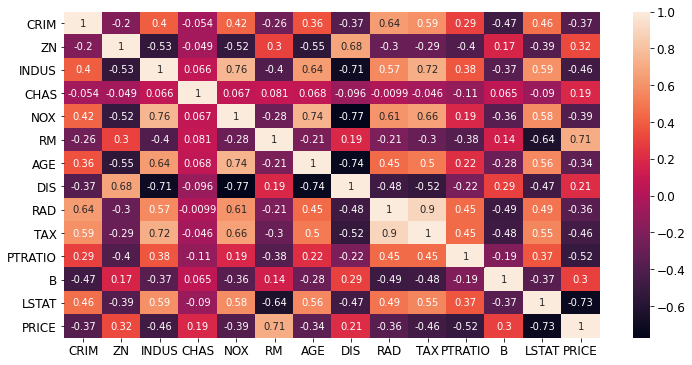

In [110]:
plt.figure(figsize=(12,6))
sns.heatmap(dataFrame.corr(), annot=True)

Agora vamos analisar se os dados para os algoritmos de ML precisam ser pré-processados e preparados. Como já vimos antes, todos os dados são numéricos, porém é importante também checar se não existem valores nulos! Vamos fazer isto então.




In [97]:
dataFrame.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Com essa análise é possível constatar que não existem valores nulos em nosso dados! Como não colocamos nenhuma feature nova, não foi necessário remover valores nulos (e alterá-los), vamos direto selecionar três modelos (kNN para regressão, Regressão Linear e Random Forest) e treiná-los.

Para compará-los vamos usar o MSE.

In [135]:
from sklearn.metrics import mean_squared_error as MSE

#Dicionário de resultados
dic = {}

boston = strat_train_set.drop('PRICE', axis = 1)
boston_labels = strat_train_set["PRICE"].copy()

In [139]:
#treinando o kNN
from sklearn import neighbors

n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(boston, boston_labels)

In [140]:
# Avaliando o kNN e anotando no dicionário

knn_predictions = knn.predict(boston)
knn_mse = MSE(boston_labels, knn_predictions)
knn_rmse = np.sqrt(knn_mse) #Não é necessariamente obrigatório

dic["kNN_reg"] =  knn_rmse

In [141]:
#treinando a regressão linear
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(boston, boston_labels) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
# Avaliando a RL e anotando no dicionário

lin_predictions = lin_reg.predict(boston)
lin_mse = MSE(boston_labels, lin_predictions)
lin_rmse = np.sqrt(lin_mse) #Não é necessariamente obrigatório

dic["lin_reg"] =  lin_rmse

In [143]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=seed)
forest_reg.fit(boston, boston_labels) #Treinar modelo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=72, verbose=0, warm_start=False)

In [144]:
# Avaliando a DT e anotando no dicionário

forest_predictions = forest_reg.predict(boston) #Predizer
forest_mse = MSE(boston_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)

dic["forest_reg"] = forest_rmse

Avaliando os modelos

In [145]:
validation = pd.Series(dic, name="MSE")

In [146]:
validation

kNN_reg       0.000000
lin_reg       4.917597
forest_reg    1.413381
Name: MSE, dtype: float64

Avaliação dos modelos

Definido que o melhor modelo é o Random Forest (erro zero é sinal de overfiting), vamos treinar o modelo final

In [149]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Vamos tentar 12 = 3x4 combinação de parâmetros
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Tentar 6 = 2×3 combinações do bootstrap no modo 'Falso'
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=seed)

# Vamos treinar com 5-folds, então temos (12+6)*5=90 rodadas de treinamento!!!

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(boston, boston_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=72,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

A melhor combinação de parâmetros encontrada:

In [151]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [152]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=72, verbose=0, warm_start=False)

Vamos olhar a pontuação de cada hiperparâmetro testado ao longo do gridSearch:

In [154]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.843762831055462 {'max_features': 2, 'n_estimators': 3}
4.244664506487623 {'max_features': 2, 'n_estimators': 10}
4.168809025091177 {'max_features': 2, 'n_estimators': 30}
4.589704265505802 {'max_features': 4, 'n_estimators': 3}
3.960784973415472 {'max_features': 4, 'n_estimators': 10}
3.8932285099538713 {'max_features': 4, 'n_estimators': 30}
4.463831182047525 {'max_features': 6, 'n_estimators': 3}
3.764407842199685 {'max_features': 6, 'n_estimators': 10}
3.711976336933701 {'max_features': 6, 'n_estimators': 30}
4.242332418675807 {'max_features': 8, 'n_estimators': 3}
3.8376329391244175 {'max_features': 8, 'n_estimators': 10}
3.879332420253211 {'max_features': 8, 'n_estimators': 30}
4.960060546604052 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.155739681670505 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.475639450508237 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.914942700857173 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [155]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006678,0.001200,0.001459,0.000110,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-13.248920,-14.130469,-44.505305,-24.629656,-20.795841,-23.462038,11.337345,17,-5.205194e+00,-6.774099e+00,-6.218716e+00,-7.801637e+00,-4.134370e+00,-6.026803e+00,1.265042e+00
1,0.015398,0.000129,0.002024,0.000058,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-10.393855,-11.327586,-41.582187,-11.139901,-15.642354,-18.017177,11.925704,12,-2.545436e+00,-3.264535e+00,-3.051038e+00,-3.962227e+00,-3.066600e+00,-3.177967e+00,4.585119e-01
2,0.042787,0.000803,0.003291,0.000106,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-9.934758,-9.758164,-34.750006,-10.466187,-21.985729,-17.378969,9.841287,10,-2.361852e+00,-2.577225e+00,-1.931234e+00,-2.514345e+00,-2.546051e+00,-2.386142e+00,2.391865e-01
3,0.006278,0.000107,0.001351,0.000052,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-20.328200,-14.689452,-28.802347,-22.485164,-19.021762,-21.065385,4.631387,15,-6.756851e+00,-6.479344e+00,-5.141437e+00,-7.086015e+00,-6.209718e+00,-6.334673e+00,6.637929e-01
4,0.019366,0.004332,0.002312,0.000592,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-11.200715,-10.468694,-30.152431,-10.337897,-16.279350,-15.687818,7.557380,8,-2.082168e+00,-2.768333e+00,-2.318195e+00,-3.357678e+00,-3.204077e+00,-2.746090e+00,4.915635e-01
5,0.049032,0.002345,0.003319,0.000143,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-10.016696,-7.370151,-33.318054,-8.156785,-16.924455,-15.157228,9.685128,6,-2.005059e+00,-2.262055e+00,-1.522101e+00,-2.119500e+00,-2.273379e+00,-2.036419e+00,2.754889e-01
6,0.006887,0.000155,0.001328,0.000040,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-13.273818,-11.247887,-37.537621,-23.693474,-13.876143,-19.925789,9.803316,13,-6.287428e+00,-7.365740e+00,-5.244166e+00,-6.779541e+00,-4.115399e+00,-5.958455e+00,1.154982e+00
7,0.018446,0.000181,0.001888,0.000011,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-10.639342,-10.151258,-26.985063,-10.042696,-13.035473,-14.170766,6.498669,2,-2.191394e+00,-3.358426e+00,-2.565411e+00,-3.199198e+00,-2.611379e+00,-2.785161e+00,4.315343e-01
8,0.053379,0.000604,0.003371,0.000197,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-10.510070,-9.150201,-28.718999,-7.847771,-12.666800,-13.778768,7.638478,1,-1.937160e+00,-2.275699e+00,-1.558610e+00,-1.874121e+00,-1.884623e+00,-1.906042e+00,2.279480e-01
9,0.007663,0.000070,0.001494,0.000028,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-14.626041,-11.291393,-37.559092,-14.154507,-12.355889,-17.997384,9.854855,11,-4.260047e+00,-6.565002e+00,-3.631574e+00,-4.447216e+00,-3.128353e+00,-4.406439e+00,1.176130e+00


Modelo final e teste

In [157]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("PRICE", axis=1)
y_test = strat_test_set["PRICE"].copy()

final_predictions = final_model.predict(X_test)

final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [158]:
final_rmse

3.2385617430802047